In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

## 1. Loading data
### scanpy data - 10x datasets

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

#Normalize
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                 8.4.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.2
cffi                1.14.6
cloudpickle         2.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.12.0
dateutil            2.8.2
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
fsspec              2021.11.1
google 

  0%|          | 0.00/8.81M [00:00<?, ?B/s]

  0%|          | 0.00/19.6M [00:00<?, ?B/s]

reading /home/poncey/Experiments/cellDART-pytorch/examples/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  0%|          | 0.00/9.26M [00:00<?, ?B/s]

  0%|          | 0.00/20.1M [00:00<?, ?B/s]

reading /home/poncey/Experiments/cellDART-pytorch/examples/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5
 (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


### single-cell dataset: GSE115746
Download from GEO and use two files "GSE115746_cells_exon_counts.csv" and "GSE115746_complete_metadata_28706-cells.csv"

In [3]:
adata_cortex = sc.read_csv('../data/GSE115746_cells_exon_counts.csv').T
adata_cortex_meta = pd.read_csv('../data/GSE115746_complete_metadata_28706-cells.csv', index_col=0)
adata_cortex_meta_ = adata_cortex_meta.loc[adata_cortex.obs.index,]

adata_cortex.obs = adata_cortex_meta_
adata_cortex.var_names_make_unique()  

In [4]:
#Preprocessing
adata_cortex.var['mt'] = adata_cortex.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_cortex, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pp.normalize_total(adata_cortex)

# scvi and clustering: Known markers with 'cell-subclass'
result_file = "../data/intermediates/GSE115746_cells_exon_counts_scvi.h5ad"
# import scvi
# scvi.model.SCVI.setup_anndata(adata_cortex)
# vae = scvi.model.SCVI(adata_cortex, n_hidden=256, n_latent=30, n_layers=2)
# vae.train()
# adata_cortex.obsm["X_scVI"] = vae.get_latent_representation()
# adata_cortex.write(result_file)

adata_cortex = sc.read_h5ad(result_file)

normalizing counts per cell
    finished (0:00:00)


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


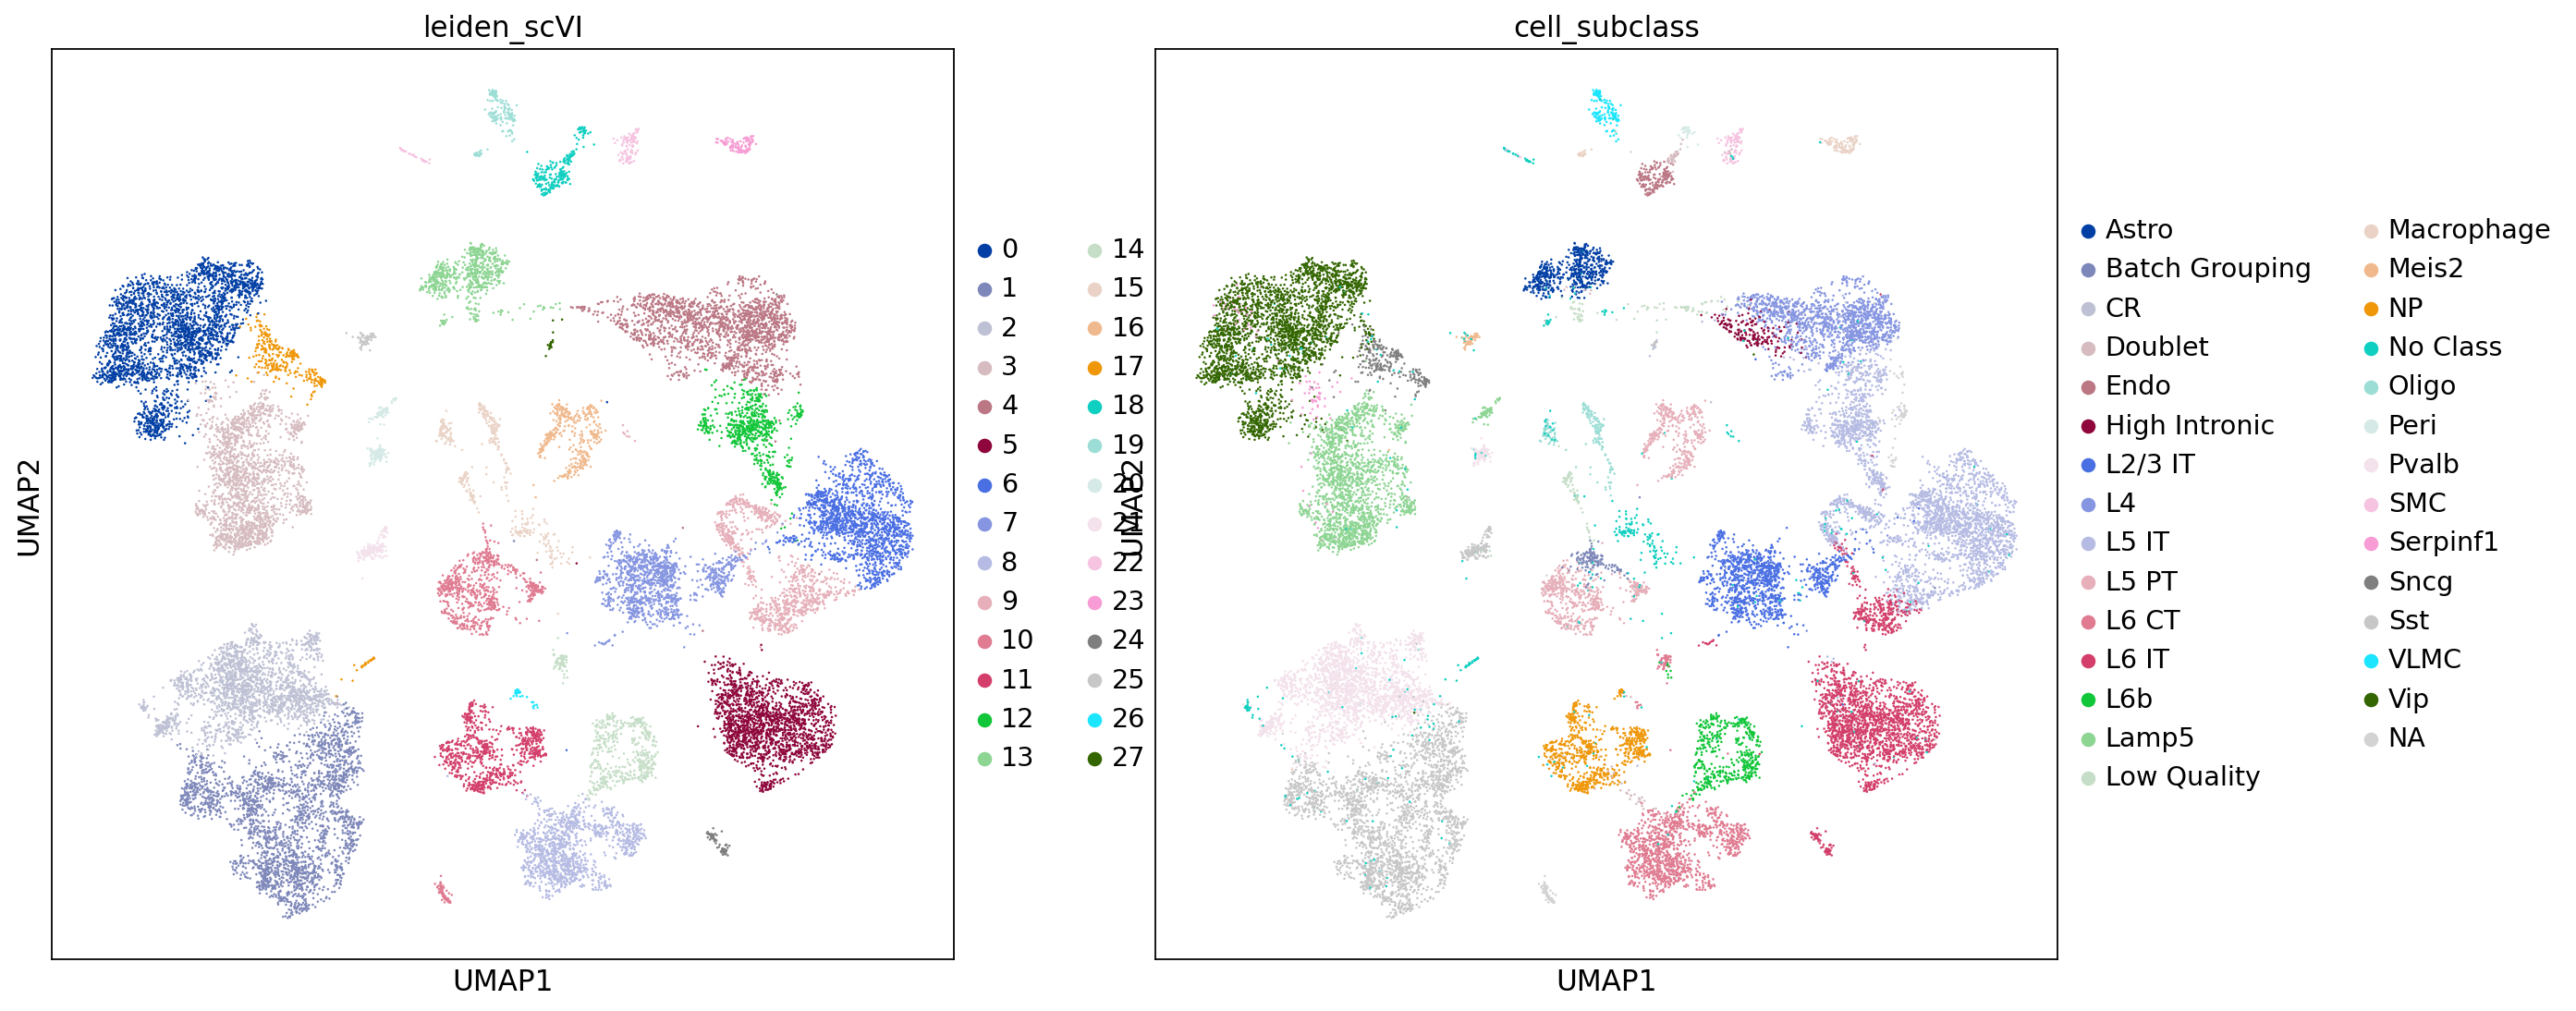

In [5]:
# mde visualization with clustering/cell-type results
sc.pp.neighbors(adata_cortex, use_rep="X_scVI")
sc.tl.leiden(adata_cortex, key_added="leiden_scVI", resolution=0.5)
sc.tl.umap(adata_cortex)
sc.pl.umap(adata_cortex, color=['leiden_scVI','cell_subclass'])

ranking genes


/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:11)


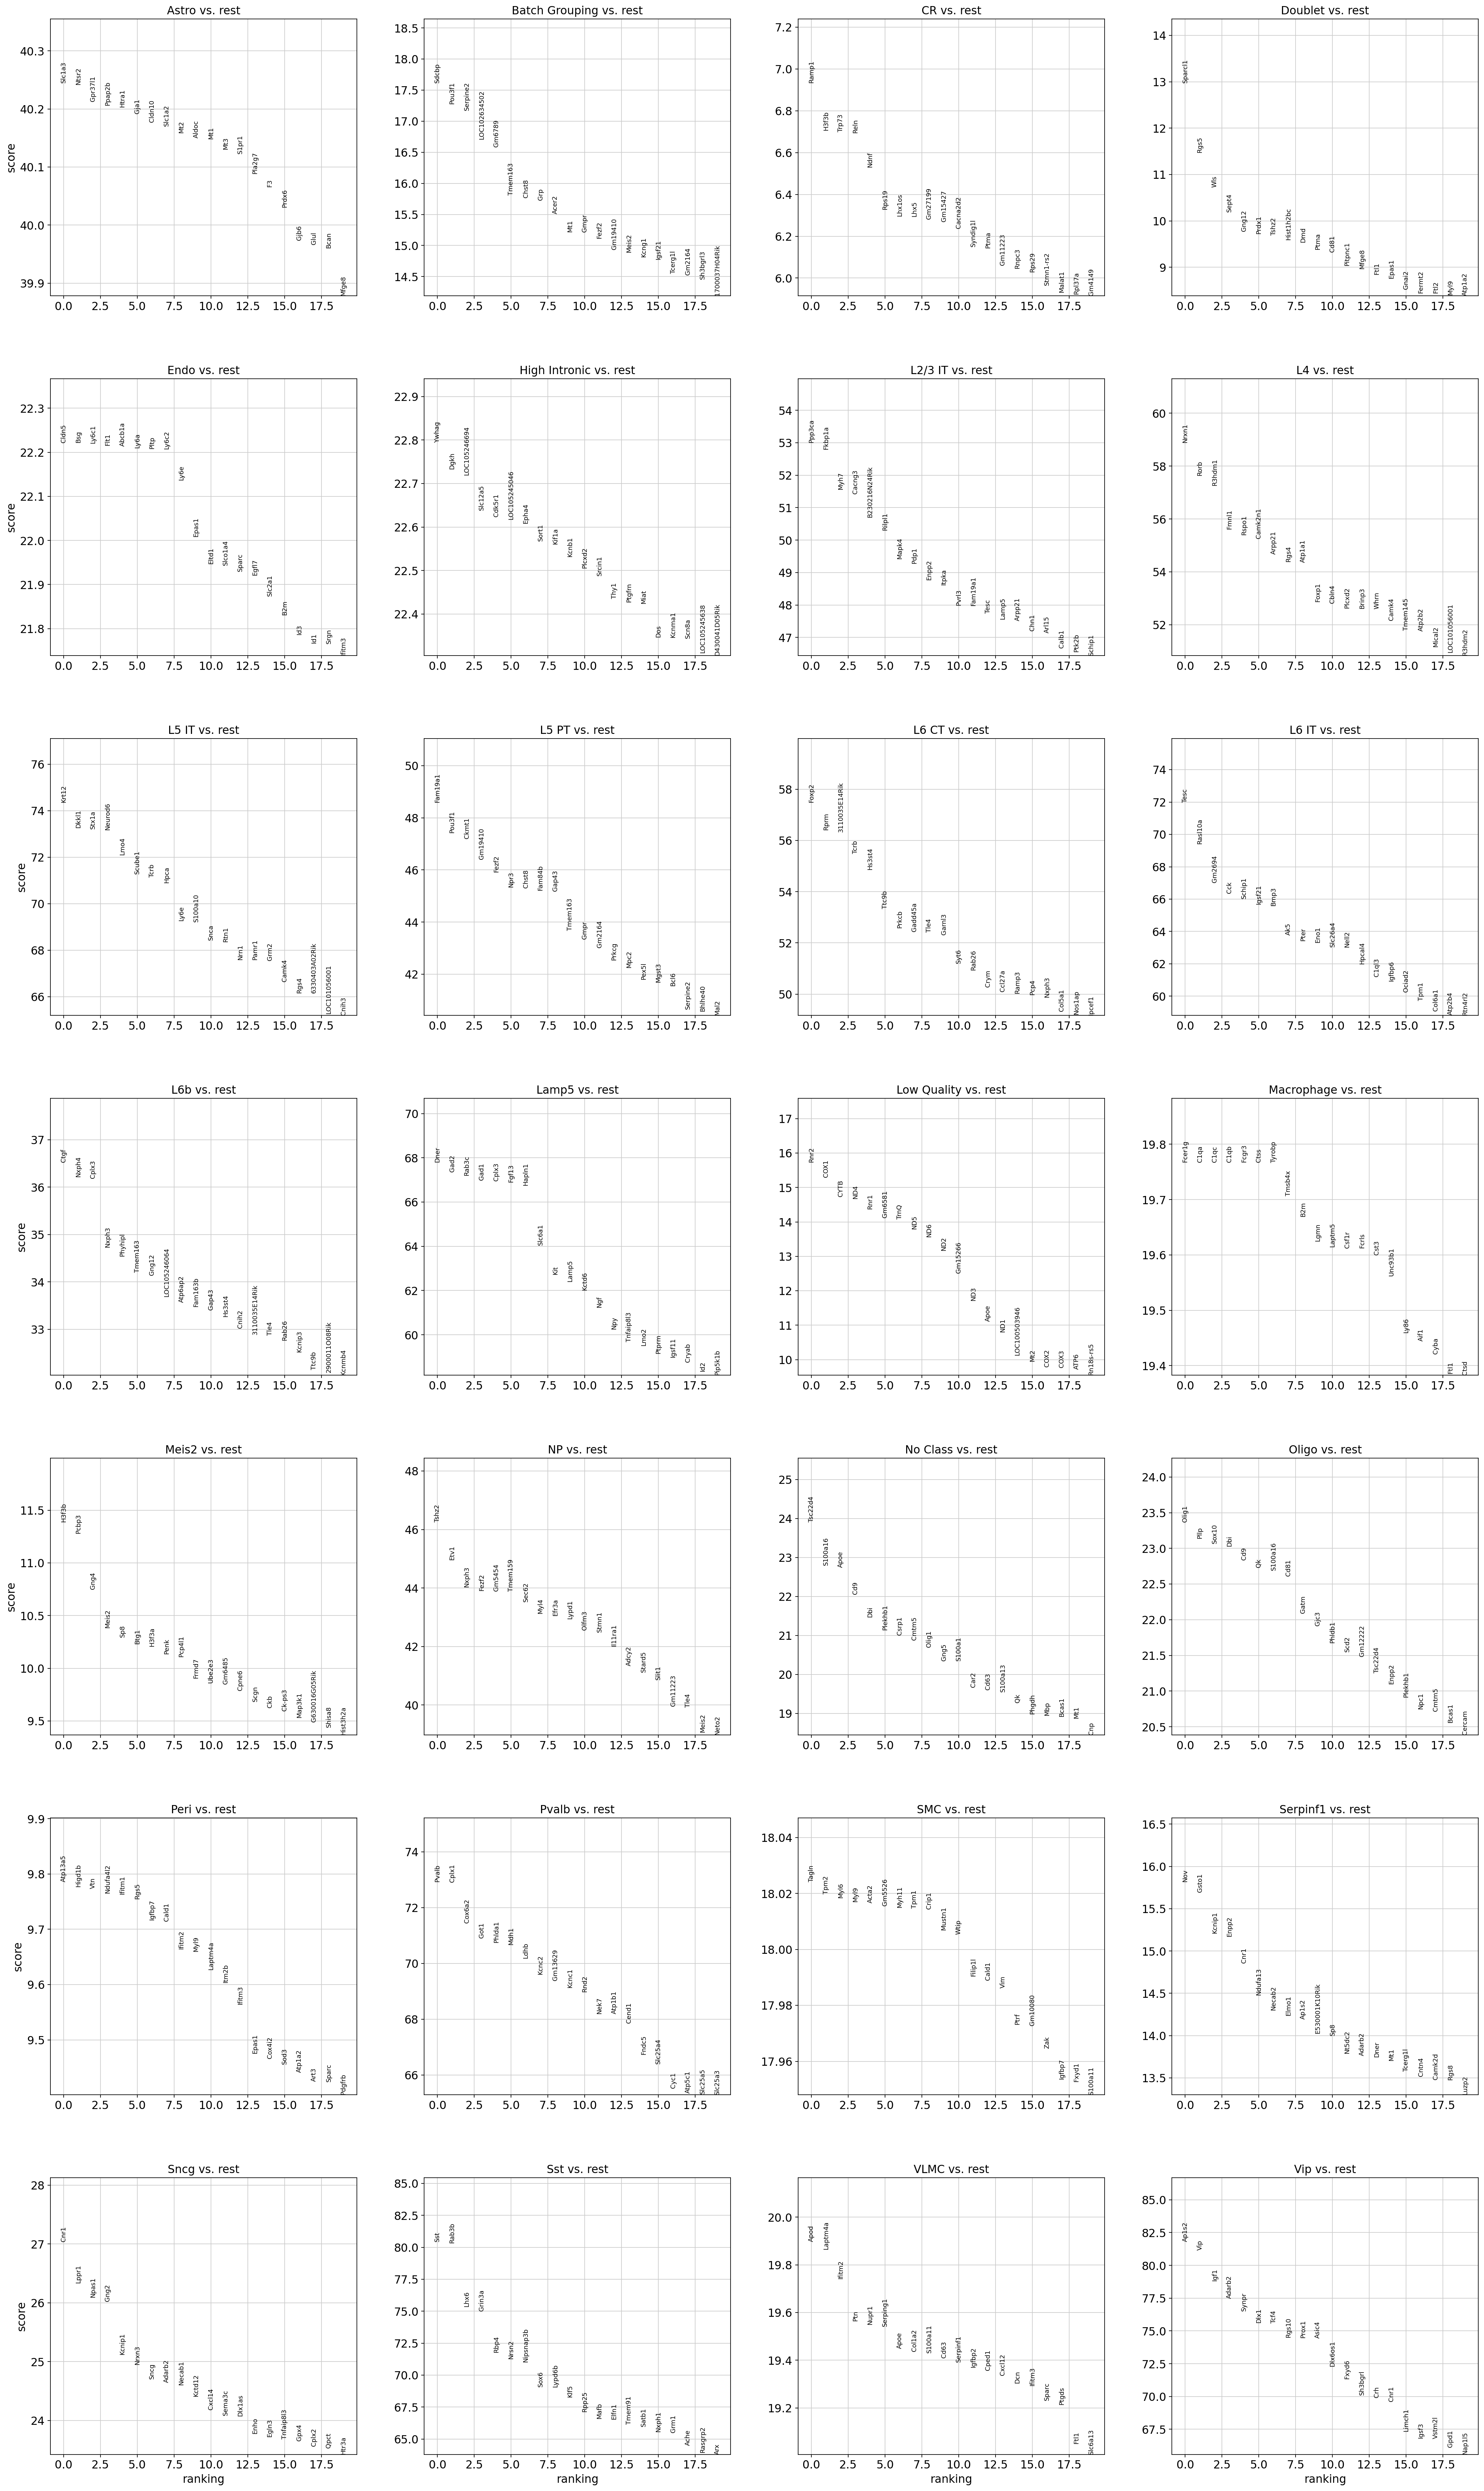

In [6]:
sc.tl.rank_genes_groups(adata_cortex, 'cell_subclass', method='wilcoxon')
sc.pl.rank_genes_groups(adata_cortex, n_genes=20, sharey=False)

In [7]:
genelists=adata_cortex.uns['rank_genes_groups']['names']
df_genelists = pd.DataFrame.from_records(genelists)
df_genelists.head(5)

,Astro,Batch Grouping,CR,Doublet,Endo,High Intronic,L2/3 IT,L4,L5 IT,L5 PT,...,No Class,Oligo,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip
0,Slc1a3,Sdcbp,Ramp1,Sparcl1,Cldn5,Ywhag,Ppp3ca,Nrxn1,Krt12,Fam19a1,...,Tsc22d4,Olig1,Atp13a5,Pvalb,Tagln,Nov,Cnr1,Sst,Apod,Ap1s2
1,Ntsr2,Pou3f1,H3f3b,Rgs5,Bsg,Dgkh,Fkbp1a,Rorb,Dkkl1,Pou3f1,...,S100a16,Pllp,Higd1b,Cplx1,Tpm2,Gsto1,Lppr1,Rab3b,Laptm4a,Vip
2,Gpr37l1,Serpine2,Trp73,Wls,Ly6c1,LOC105246694,Myh7,R3hdm1,Stx1a,Ckmt1,...,Apoe,Sox10,Vtn,Cox6a2,Myl6,Kcnip1,Npas1,Lhx6,Ifitm2,Igf1
3,Ppap2b,LOC102634502,Reln,Sept4,Flt1,Slc12a5,Cacng3,Fmnl1,Neurod6,Gm19410,...,Cd9,Dbi,Ndufa4l2,Got1,Myl9,Enpp2,Gng2,Grin3a,Ptn,Adarb2
4,Htra1,Gm6789,Ndnf,Gng12,Abcb1a,Cdk5r1,B230216N24Rik,Rspo1,Lmo4,Fezf2,...,Dbi,Cd9,Ifitm1,Phlda1,Acta2,Cnr1,Kcnip1,Rbp4,Nupr1,Synpr


In [8]:
num_markers=10
res_genes = []
for column in df_genelists.head(num_markers): 
    res_genes.extend(df_genelists.head(num_markers)[column].tolist())
res_genes_ = list(set(res_genes))

### select same gene features

In [9]:
adata_spatial_anterior.var_names_make_unique() 
inter_genes = [val for val in res_genes_ if val in adata_spatial_anterior.var.index]
print('Selected Feature Gene number',len(inter_genes))
adata_cortex = adata_cortex[:,inter_genes]

adata_spatial_anterior = adata_spatial_anterior[:,inter_genes]

Selected Feature Gene number 228


In [10]:
adata_cortex.write("../data/preprocessed/adata_cortex.h5ad")
adata_spatial_anterior.write("../data/preprocessed/adata_spatial_anterior.h5ad")

/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
